<a href="https://colab.research.google.com/github/srikavya26/Credit-Default/blob/main/UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

**Credit Default**

**Dataset** :
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Default of Credit Card Clients Dataset (UCI Machine Learning Repository)

**Install Required Libraries**




**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

**Understanding the Dataset**

In [3]:
df = pd.read_excel('default of credit card clients.xls', sheet_name='Data', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


**Exploratory Data Analysis**

In [5]:
df.rename(columns={"default payment next month": "default"}, inplace=True)


In [8]:
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

categorical_cols = df.select_dtypes(include=["object"]).columns

if len(categorical_cols) > 0:
    print("\nEncoding categorical columns:", categorical_cols)
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

In [9]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model - 1**

*Decision Tree*

In [11]:
decision_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
decision_tree2 = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=42
)
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

*Model-1 Metrics*

In [13]:
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate(decision_tree, X_test, y_test, "Decision Tree")


Decision Tree
Accuracy: 0.7145
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000



In [14]:
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n {name} ")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate(decision_tree2, X_test, y_test, "Decision Tree")


 Decision Tree 
Accuracy: 0.8163333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



**Model - 2**

In [15]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

*Model-2 Metrics*

In [16]:
evaluate(xgb_model, X_test_scaled, y_test, "XGBoost")



 XGBoost 
Accuracy: 0.8175
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



**Model - 3**

In [17]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()


*Model-3 Metrics*



In [18]:
evaluate(nb_model, X_test_scaled, y_test, "Gaussian Naive Bayes")



 Gaussian Naive Bayes 
Accuracy: 0.7525
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4673
           1       0.45      0.55      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.75      0.76      6000



Imbalancee

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: default
0    18691
1     5309
Name: count, dtype: int64
After SMOTE: default
0    18691
1    18691
Name: count, dtype: int64


In [21]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [22]:
evaluate(dt, X_test_scaled, y_test, "Decision Tree with SMOTE")



 Decision Tree with SMOTE 
Accuracy: 0.6991666666666667
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4673
           1       0.36      0.46      0.40      1327

    accuracy                           0.70      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.70      0.71      6000



In [23]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=1,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
evaluate(xgb, X_test_scaled, y_test, "XGBoost with SMOTE")



 XGBoost with SMOTE 
Accuracy: 0.7981666666666667
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.47      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



In [25]:
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [26]:
evaluate(nb, X_test_scaled, y_test, "Gaussian NB with SMOTE")



 Gaussian NB with SMOTE 
Accuracy: 0.4728333333333333
              precision    recall  f1-score   support

           0       0.88      0.37      0.52      4673
           1       0.27      0.83      0.41      1327

    accuracy                           0.47      6000
   macro avg       0.58      0.60      0.47      6000
weighted avg       0.75      0.47      0.50      6000



In [27]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 3.520625353173856


In [28]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

In [29]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [30]:
param_dist = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    cv=3,
    scoring="f1",
    n_iter=20,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_scaled, y_train)
best_model = search.best_estimator_

print("\nBest Parameters:")
print(search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters:
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.7}


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



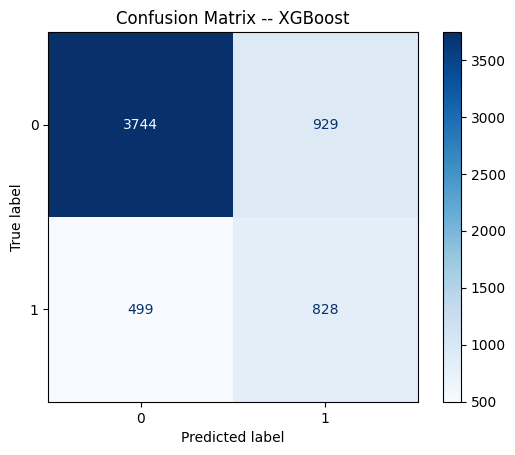

In [33]:
y_pred = best_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix -- XGBoost")
plt.show()


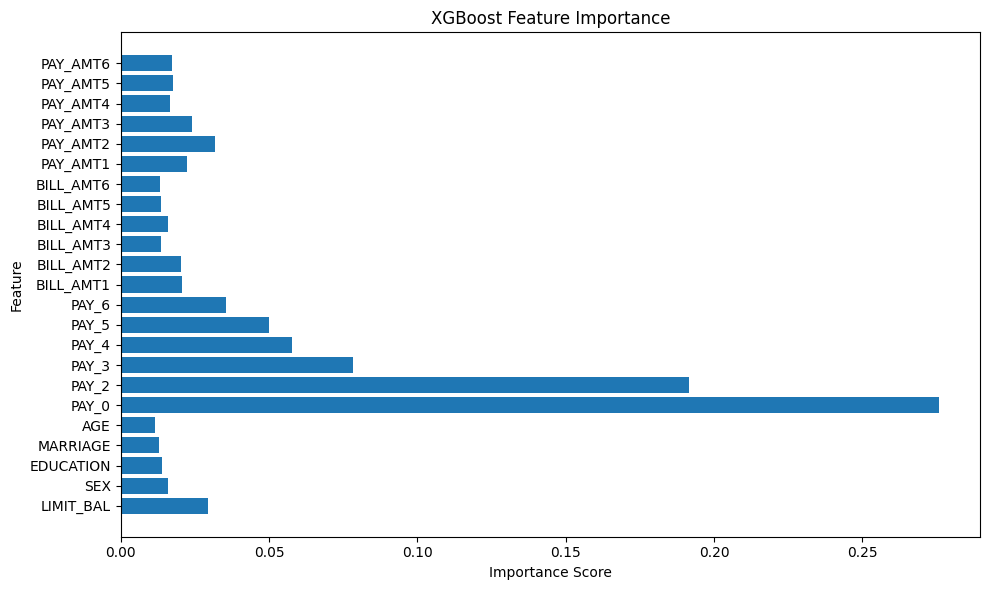

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Model - 4**

In [31]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [38]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(16, activation="relu"),

    Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [40]:
history = model.fit(
    X_train_res,
    y_train_res,
    epochs=25,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


Epoch 1/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6642 - loss: 0.6426 - val_accuracy: 0.4713 - val_loss: 0.7175
Epoch 2/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7255 - loss: 0.5852 - val_accuracy: 0.4761 - val_loss: 0.7231
Epoch 3/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7299 - loss: 0.5748 - val_accuracy: 0.4942 - val_loss: 0.7522
Epoch 4/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5618 - val_accuracy: 0.5045 - val_loss: 0.7458
Epoch 5/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7341 - loss: 0.5589 - val_accuracy: 0.5076 - val_loss: 0.7362
Epoch 6/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7356 - loss: 0.5577 - val_accuracy: 0.5081 - val_loss: 0.7532
Epoch 7/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7388 - loss: 0.5494 - val_accuracy: 0.5157 - val_loss: 0.7189
Epoch 8/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7432 - loss: 0.5454 - val_accuracy: 0.

In [41]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7983333333333333
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4673
           1       0.55      0.52      0.53      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.79      0.80      0.80      6000



*Model-4 Metrics*

**Model - 5**

*Model-5 Metrics*

#*Evaluating Results*

#Conclusion